In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 98%!important}</style>"))

In [2]:
import pandas as pd
import numpy as np
from scipy.special import softmax
import matplotlib.pyplot as plt

from utilities import read_data, read_pin, scanners

## Import Data

In [3]:
pin = read_pin("../Data/pin.csv")
data = read_data("../Data/rssi3.csv")

All beacons: ['0117C55D14E4']
Selecting all


## Inspect Data based on Location
1. Mean of the RSSI correlates with the sample rate
2. RSSI received by the closest scanners usually has a middle level of standard deviation

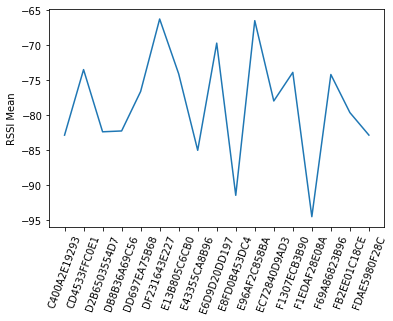

In [4]:
m = data[data['location'] == "V1_23"].describe().loc["mean", :]
plt.plot(np.arange(17), m)
plt.xticks(np.arange(17), scanners, rotation=70)
plt.ylabel("RSSI Mean")
plt.show()

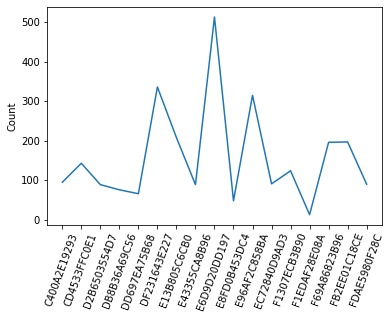

In [5]:
m = data[data['location'] == "V1_23"].describe().loc["count", :]
plt.plot(np.arange(17), m)
plt.xticks(np.arange(17), scanners, rotation=70)
plt.ylabel("Count")
plt.show()

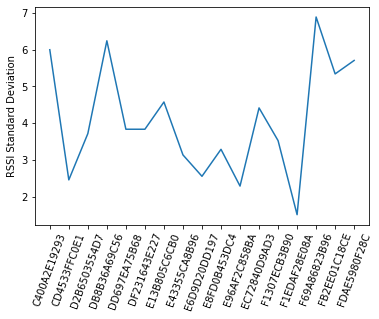

In [6]:
m = data[data['location'] == "V1_23"].describe().loc["std", :]
plt.plot(np.arange(17), m)
plt.xticks(np.arange(17), scanners, rotation=70)
plt.ylabel("RSSI Standard Deviation")
plt.show()

In [7]:
data[data['location'] == "V1_23"].describe()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
count,95.000000,143.000000,89.000000,76.000000,66.000000,336.000000,208.000000,89.000000,513.000000,48.000000,315.000000,91.000000,124.000000,13.000000,196.000000,197.000000,90.000000
mean,-82.863158,-73.475524,-82.382022,-82.263158,-76.606061,-66.229167,-74.081731,-85.033708,-69.684211,-91.479167,-66.466667,-77.967033,-73.870968,-94.538462,-74.178571,-79.629442,-82.855556
std,6.001082,2.454752,3.715770,6.244717,3.834575,3.834390,4.576568,3.135027,2.552129,3.287563,2.285652,4.415756,3.524520,1.506397,6.892861,5.342336,5.709368
min,-92.000000,-80.000000,-92.000000,-97.000000,-96.000000,-82.000000,-94.000000,-94.000000,-81.000000,-98.000000,-73.000000,-94.000000,-82.000000,-98.000000,-92.000000,-91.000000,-96.000000
25%,-89.500000,-75.000000,-84.000000,-89.000000,-79.000000,-67.000000,-77.000000,-87.000000,-71.000000,-94.000000,-69.000000,-78.500000,-75.000000,-95.000000,-77.000000,-81.000000,-89.000000
50%,-82.000000,-73.000000,-84.000000,-81.000000,-77.000000,-64.000000,-73.000000,-84.000000,-69.000000,-91.000000,-66.000000,-77.000000,-74.000000,-94.000000,-72.000000,-78.000000,-80.000000
75%,-77.000000,-72.000000,-79.000000,-77.000000,-73.250000,-64.000000,-70.000000,-82.000000,-68.000000,-89.000000,-65.000000,-75.000000,-71.500000,-93.000000,-69.000000,-75.000000,-78.000000
max,-76.000000,-69.000000,-76.000000,-75.000000,-72.000000,-62.000000,-68.000000,-81.000000,-65.000000,-85.000000,-62.000000,-74.000000,-68.000000,-93.000000,-66.000000,-71.000000,-77.000000


## Inspect Data based on Location and Scanner
1. Scanners further away have a low sample rate

In [8]:
def loc_scanner(loc, scanner):
    V1 = data[data['location'] == loc]
    plt.figure()
    plt.plot(np.arange(V1.shape[0]), V1[scanner])
    plt.show()
    
    plt.figure()
    plt.hist(V1[scanner])
    plt.show()

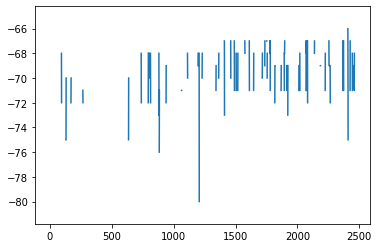

/home/mimos/anaconda3/envs/loc/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/mimos/anaconda3/envs/loc/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


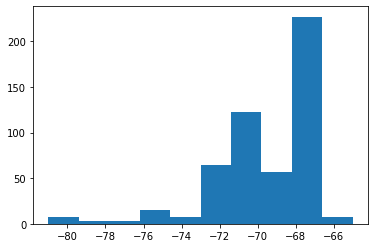

In [9]:
loc_scanner("V1_23", "E6D9D20DD197")

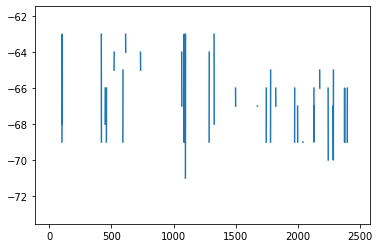

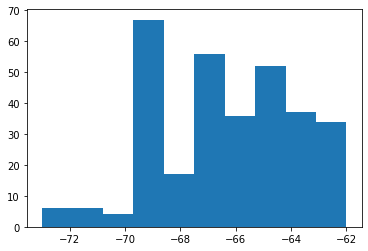

In [10]:
loc_scanner("V1_23", "E96AF2C858BA")

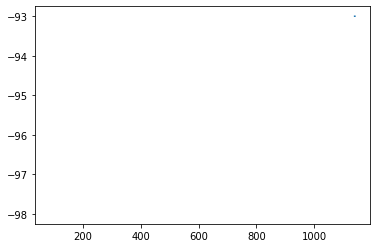

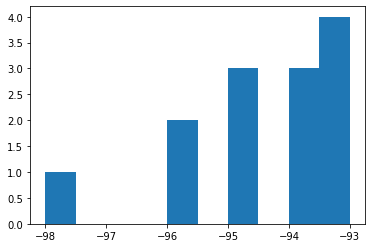

In [11]:
loc_scanner("V1_23", "F1EDAF28E08A")

## Group by Data within a Fixed Interval
1. The mean RSSI is correlated with sample rate
2. Standard deviation of the scanners closed to the beacon is at middle level

In [12]:
data_mean = data.groupby(["location", pd.Grouper(key="time", freq="5s")]).mean().reset_index()
data_mean

,location,time,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_12,2019-12-02 01:30:00,-79.500000,-66.666667,-75.000000,-72.800000,-70.666667,-76.300000,NaN,-82.333333,-83.166667,-92.333333,-81.000000,-58.181818,-66.750000,-87.166667,-71.500000,-91.000000,-75.750000
1,V1_12,2019-12-02 01:30:05,-76.666667,-66.142857,-72.666667,-74.000000,-73.500000,-74.250000,-84.666667,-83.333333,-83.750000,-89.000000,-84.500000,-58.333333,-69.500000,-89.000000,-73.300000,-94.000000,-75.000000
2,V1_12,2019-12-02 01:30:10,-75.875000,-65.750000,-74.250000,-74.400000,-73.166667,-77.666667,-81.444444,-83.000000,-83.818182,-90.800000,-84.833333,-58.181818,-69.444444,-90.444444,-72.600000,-93.000000,-75.333333
3,V1_12,2019-12-02 01:30:15,-76.800000,-66.500000,-76.166667,-74.666667,-72.333333,-75.400000,-80.250000,-84.600000,-86.666667,-90.000000,-90.000000,-59.071429,-67.444444,-90.333333,-73.500000,-91.666667,-74.875000
4,V1_12,2019-12-02 01:30:20,-80.900000,NaN,-73.500000,-72.800000,-75.909091,-76.333333,-80.000000,-85.000000,-89.000000,-91.666667,-83.333333,-58.285714,-69.600000,-90.142857,-72.071429,-92.666667,-75.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,V1_32,2019-12-03 08:27:45,-89.000000,-83.000000,-84.000000,-90.000000,-89.500000,-70.200000,-77.000000,-92.500000,-68.428571,-93.000000,-55.750000,-83.000000,NaN,NaN,-83.250000,-72.428571,-85.000000
284,V1_32,2019-12-03 08:27:50,-88.666667,-82.600000,-83.000000,-92.500000,-90.500000,-74.142857,-82.000000,-94.000000,-69.750000,NaN,-56.529412,-82.428571,-84.000000,NaN,-83.666667,-71.285714,-84.600000
285,V1_32,2019-12-03 08:27:55,-87.500000,-79.500000,-83.400000,-92.333333,NaN,-75.333333,-78.714286,-94.000000,-69.695652,-94.000000,-58.058824,-79.666667,-84.500000,NaN,NaN,-70.363636,-85.000000
286,V1_32,2019-12-03 08:28:00,-92.000000,-81.428571,-82.000000,-87.000000,-87.000000,-77.000000,-75.222222,NaN,-69.692308,-95.000000,-58.800000,-80.750000,-81.500000,NaN,NaN,-72.700000,-85.250000


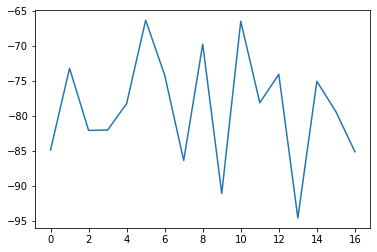

In [13]:
m = data_mean[data_mean['location'] == "V1_23"].describe().loc["mean", :]
plt.plot(np.arange(17), m)

In [14]:
data_median = data.groupby(["location", pd.Grouper(key="time", freq="5s")]).median().reset_index()
data_median

,location,time,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_12,2019-12-02 01:30:00,-79.5,-66.0,-75.0,-71.0,-71.0,-76.0,NaN,-82.0,-82.5,-92.0,-81.0,-58.0,-67.0,-85.0,-71.5,-91.0,-76.0
1,V1_12,2019-12-02 01:30:05,-75.0,-66.0,-72.0,-77.0,-70.5,-73.0,-85.0,-82.5,-83.5,-89.0,-85.0,-58.5,-68.0,-89.0,-73.5,-94.0,-75.0
2,V1_12,2019-12-02 01:30:10,-74.5,-66.0,-74.5,-73.5,-71.0,-80.0,-80.0,-81.0,-84.0,-91.0,-87.0,-59.0,-68.0,-91.0,-72.0,-93.0,-75.0
3,V1_12,2019-12-02 01:30:15,-77.0,-65.0,-74.5,-74.5,-70.5,-75.0,-80.5,-83.0,-86.0,-89.0,-90.0,-59.0,-67.0,-90.0,-74.0,-92.0,-75.0
4,V1_12,2019-12-02 01:30:20,-82.0,NaN,-73.5,-71.0,-71.0,-76.0,-80.0,-85.0,-88.0,-91.0,-83.0,-58.0,-69.0,-89.0,-72.0,-93.0,-74.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,V1_32,2019-12-03 08:27:45,-89.0,-84.0,-84.0,-90.0,-89.0,-67.0,-73.0,-92.5,-68.0,-93.0,-58.0,-81.0,NaN,NaN,-83.0,-74.0,-85.0
284,V1_32,2019-12-03 08:27:50,-87.0,-82.0,-83.0,-92.5,-90.5,-76.0,-84.0,-94.0,-69.0,NaN,-58.0,-81.0,-84.0,NaN,-84.0,-70.0,-84.0
285,V1_32,2019-12-03 08:27:55,-87.5,-79.5,-83.0,-91.0,NaN,-76.0,-73.0,-94.0,-69.0,-94.0,-58.0,-80.0,-84.5,NaN,NaN,-69.0,-85.0
286,V1_32,2019-12-03 08:28:00,-92.0,-81.0,-82.0,-87.0,-87.0,-77.0,-73.0,NaN,-69.0,-95.0,-58.0,-80.0,-81.5,NaN,NaN,-75.0,-84.0


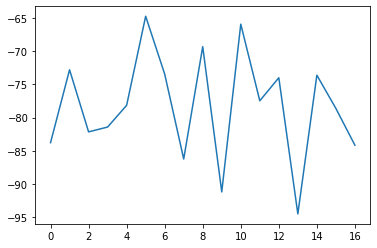

In [15]:
m = data_median[data_median['location'] == "V1_23"].describe().loc["mean", :]
plt.plot(np.arange(17), m)

In [16]:
data_std = data.groupby(["location", pd.Grouper(key="time", freq="5s")]).std().reset_index()
data_std

,location,time,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_12,2019-12-02 01:30:00,4.932883,1.751190,1.000000,5.069517,0.577350,3.888730,NaN,0.577350,2.401388,3.511885,4.242641,1.328020,2.217356,4.665476,1.643168,NaN,2.217356
1,V1_12,2019-12-02 01:30:05,6.121002,1.573592,1.154701,4.873397,5.049752,4.200340,4.509250,3.559026,1.669046,NaN,1.914854,1.366260,3.331666,4.582576,2.869379,2.000000,1.309307
2,V1_12,2019-12-02 01:30:10,4.911721,0.753778,0.957427,5.985167,4.445972,4.932883,3.045944,4.690416,0.603023,2.588436,3.371449,1.401298,3.244654,2.650996,1.173788,0.000000,1.414214
3,V1_12,2019-12-02 01:30:15,4.711688,3.696846,5.913262,6.282250,4.206777,3.577709,0.957427,5.412947,3.881580,3.464102,8.485281,2.464027,1.740051,3.427827,4.603510,0.577350,1.552648
4,V1_12,2019-12-02 01:30:20,5.237684,NaN,1.290994,3.271085,6.187965,4.082483,0.707107,2.828427,2.598076,1.322876,2.065591,0.913874,3.911521,2.544836,1.774360,0.577350,1.595131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,V1_32,2019-12-03 08:27:45,NaN,2.000000,0.000000,NaN,1.732051,5.357238,8.000000,2.121320,2.820841,NaN,3.623994,4.183300,NaN,NaN,1.500000,2.992053,1.414214
284,V1_32,2019-12-03 08:27:50,3.785939,0.894427,1.000000,3.535534,0.707107,5.756983,9.823441,NaN,2.989178,NaN,3.793377,4.685337,NaN,NaN,0.577350,3.545621,0.894427
285,V1_32,2019-12-03 08:27:55,0.707107,3.535534,2.302173,3.214550,NaN,8.687155,8.731443,NaN,2.687256,NaN,4.464731,0.577350,0.707107,NaN,NaN,3.443043,NaN
286,V1_32,2019-12-03 08:28:00,NaN,2.636737,NaN,NaN,NaN,4.869732,5.517648,NaN,3.133933,NaN,4.549725,2.217356,0.707107,NaN,NaN,3.653005,2.500000


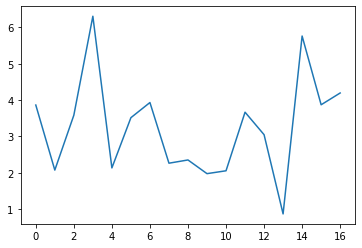

In [17]:
m = data_std[data_std['location'] == "V1_23"].describe().loc["mean", :]
plt.plot(np.arange(17), m)

In [18]:
data_count = data.groupby(["location", pd.Grouper(key="time", freq="5s")]).count().reset_index()
data_count

,location,time,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_12,2019-12-02 01:30:00,4,6,3,5,3,10,0,3,6,3,2,11,4,6,6,1,4
1,V1_12,2019-12-02 01:30:05,6,7,3,9,6,8,3,6,8,1,4,6,6,5,10,3,8
2,V1_12,2019-12-02 01:30:10,8,12,4,10,6,3,9,5,11,5,6,11,9,9,10,2,9
3,V1_12,2019-12-02 01:30:15,5,4,6,6,12,5,4,5,6,4,2,14,9,9,14,3,8
4,V1_12,2019-12-02 01:30:20,10,0,4,5,11,6,5,2,9,9,6,14,5,7,14,3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,V1_32,2019-12-03 08:27:45,1,4,3,1,4,5,4,2,21,1,16,5,0,0,4,7,2
284,V1_32,2019-12-03 08:27:50,3,5,5,2,2,7,5,1,28,0,17,7,1,0,3,7,5
285,V1_32,2019-12-03 08:27:55,2,2,5,3,0,6,7,1,23,1,17,3,2,0,0,11,1
286,V1_32,2019-12-03 08:28:00,1,7,1,1,1,8,9,0,26,1,5,4,2,0,0,10,4


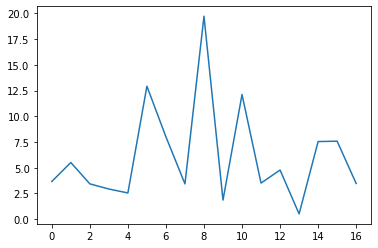

In [19]:
m = data_count[data_count['location'] == "V1_23"].describe().loc["mean", :]
plt.plot(np.arange(17), m)

## Rolling Data

In [20]:
data.set_index("time", inplace=True)

In [21]:
data_rolled = data.groupby("location").rolling(15, min_periods=1).mean().reset_index()
data_rolled

,location,time,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_12,2019-12-02 01:30:01.374,NaN,-66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.0,NaN,NaN,NaN
1,V1_12,2019-12-02 01:30:01.435,NaN,-66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-58.0,NaN,-84.0,NaN,NaN,NaN
2,V1_12,2019-12-02 01:30:01.538,NaN,-66.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-58.0,NaN,-84.0,NaN,NaN,NaN
3,V1_12,2019-12-02 01:30:01.674,NaN,-66.5,NaN,NaN,NaN,-71.0,NaN,NaN,NaN,NaN,NaN,-58.0,NaN,-84.0,NaN,NaN,NaN
4,V1_12,2019-12-02 01:30:01.696,NaN,-66.0,NaN,NaN,NaN,-71.0,NaN,NaN,NaN,NaN,NaN,-58.0,NaN,-84.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24299,V1_32,2019-12-03 08:28:09.176,-89.0,-83.0,-80.0,NaN,-86.0,NaN,-76.0,NaN,-68.00,NaN,-58.000000,-79.0,-82.0,NaN,-82.0,-68.0,-86.0
24300,V1_32,2019-12-03 08:28:09.213,-89.0,-83.0,-80.0,NaN,-86.0,NaN,-76.0,NaN,-68.75,NaN,-58.000000,-79.0,-82.0,NaN,-82.0,-68.0,-86.0
24301,V1_32,2019-12-03 08:28:09.250,-89.0,-83.0,-80.0,NaN,-86.0,NaN,-76.0,NaN,-68.75,NaN,-59.666667,-79.0,-82.0,NaN,NaN,-68.0,-86.0
24302,V1_32,2019-12-03 08:28:09.285,NaN,-83.0,-80.0,NaN,-86.0,NaN,-76.0,NaN,-68.75,NaN,-59.666667,-81.5,-82.0,NaN,NaN,-68.0,-86.0


In [22]:
data_rolled.describe()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
count,9900.000000,16450.000000,12479.000000,13140.000000,12111.000000,17263.000000,18476.000000,10352.000000,21632.000000,5174.000000,17799.000000,13428.000000,13553.000000,7503.000000,15062.000000,14672.000000,12285.000000
mean,-84.163013,-73.100322,-78.872519,-81.078539,-76.514253,-70.870111,-71.815479,-85.630482,-74.478923,-91.436042,-73.554348,-74.289337,-73.099705,-89.662437,-72.930954,-81.046752,-84.298354
std,5.618453,6.670822,6.099939,6.239933,5.870854,6.170385,7.293392,5.160511,9.298940,3.834288,8.389725,7.905365,6.052048,4.463319,8.417955,7.002697,5.278696
min,-97.000000,-96.000000,-96.000000,-98.000000,-96.000000,-94.000000,-94.000000,-97.000000,-95.000000,-98.000000,-98.000000,-96.000000,-94.000000,-98.000000,-97.000000,-97.000000,-98.000000
25%,-89.000000,-78.000000,-83.000000,-86.000000,-80.000000,-75.000000,-76.500000,-89.500000,-81.333333,-95.000000,-80.000000,-80.000000,-77.000000,-93.000000,-79.500000,-87.000000,-87.500000
50%,-84.000000,-72.500000,-79.000000,-81.000000,-76.000000,-71.000000,-72.000000,-85.333333,-75.666667,-91.000000,-73.000000,-75.000000,-72.500000,-90.000000,-73.000000,-81.250000,-84.000000
75%,-80.000000,-66.666667,-75.000000,-77.000000,-72.500000,-66.000000,-66.000000,-82.000000,-70.200000,-89.000000,-67.000000,-70.000000,-69.500000,-87.000000,-68.000000,-75.000000,-81.000000
max,-72.000000,-63.000000,-67.000000,-66.000000,-65.000000,-55.000000,-53.000000,-73.000000,-49.000000,-82.000000,-52.000000,-55.000000,-61.000000,-78.000000,-56.000000,-66.000000,-72.000000


In [23]:
data_rolled.isna().sum()

location            0
time                0
C400A2E19293    14404
CD4533FFC0E1     7854
D2B6503554D7    11825
DB8B36A69C56    11164
DD697EA75B68    12193
DF231643E227     7041
E13B805C6CB0     5828
E43355CA8B96    13952
E6D9D20DD197     2672
E8FD0B453DC4    19130
E96AF2C858BA     6505
EC72840D9AD3    10876
F1307ECB3B90    10751
F1EDAF28E08A    16801
F69A86823B96     9242
FB2EE01C18CE     9632
FDAE5980F28C    12019
dtype: int64

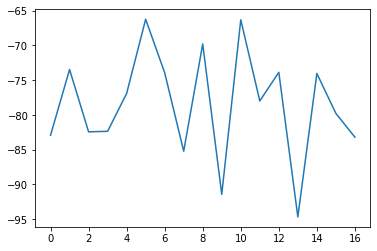

In [24]:
m = data_rolled[data_rolled['location'] == "V1_23"].describe().loc["mean", :]
plt.plot(np.arange(17), m)

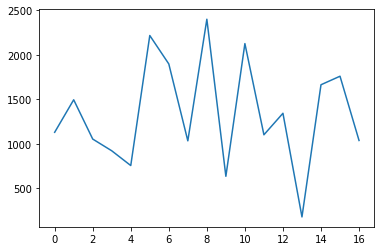

In [25]:
m = data_rolled[data_rolled['location'] == "V1_23"].describe().loc["count", :]
plt.plot(np.arange(17), m)

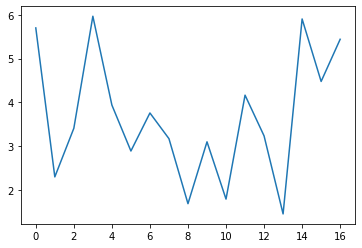

In [26]:
m = data_rolled[data_rolled['location'] == "V1_23"].describe().loc["std", :]
plt.plot(np.arange(17), m)

In [27]:
def loc_scanner(loc, scanner):
    V1 = data_rolled[data_rolled['location'] == loc]
    V1_real = data[data['location'] == loc]
    plt.figure()
    plt.plot(np.arange(V1.shape[0]), V1[scanner], label="Smoothed")
    plt.plot(np.arange(V1_real.shape[0]), V1_real[scanner], label="Real")
    plt.legend()
    plt.show()
    
    plt.figure()
    plt.hist(V1[scanner])
    plt.show()

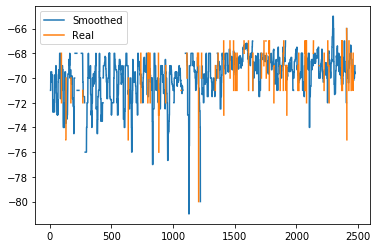

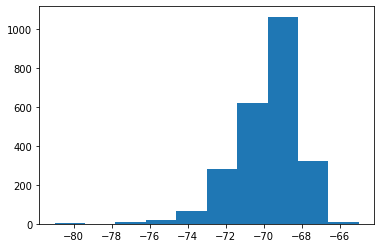

In [28]:
loc_scanner("V1_23", "E6D9D20DD197")

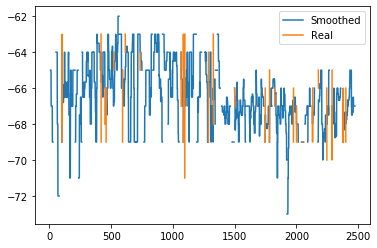

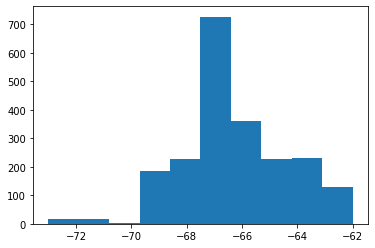

In [29]:
loc_scanner("V1_23", "E96AF2C858BA")

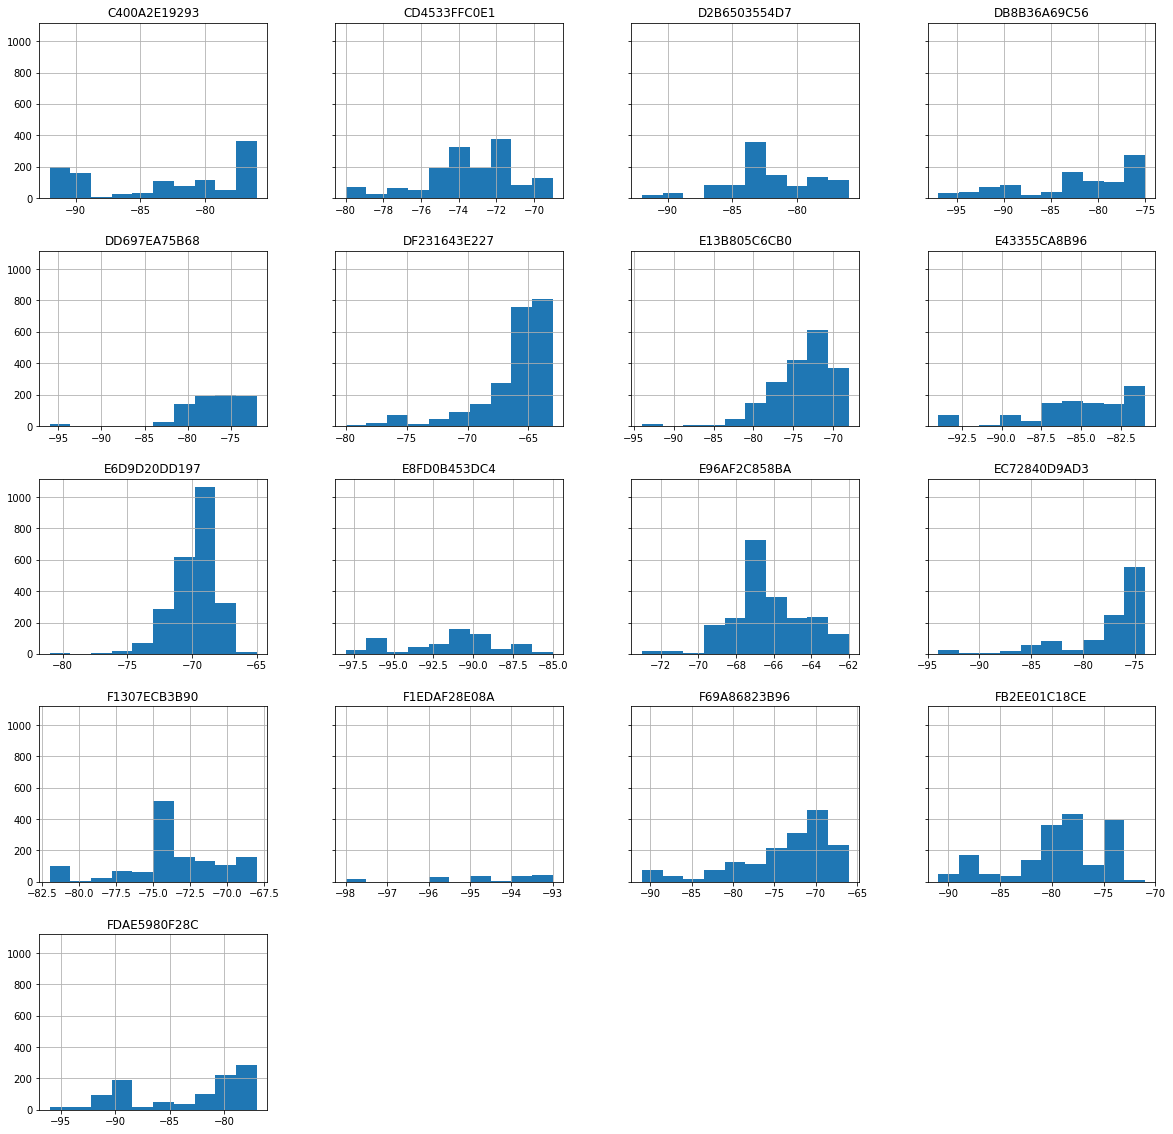

In [30]:
data_rolled[data_rolled['location'] == "V1_23"].hist(figsize=(20,20), sharey=True)
plt.show()

## EWM

In [31]:
data[scanners] = data.groupby("location").apply(lambda x: x.ewm(com=50).mean())
data

,location,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
time,,,,,,,,,,,,,,,,,,
2019-12-02 01:05:32.956,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-02 01:05:32.976,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0000,NaN,NaN,NaN,NaN,-82.000000,NaN,NaN,NaN,NaN
2019-12-02 01:05:33.015,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0000,-72.000000,NaN,NaN,NaN,-82.000000,NaN,NaN,NaN,NaN
2019-12-02 01:05:33.034,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0000,-72.000000,NaN,NaN,NaN,-80.470300,NaN,NaN,NaN,NaN
2019-12-02 01:05:33.096,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0000,-72.000000,NaN,NaN,NaN,-80.470300,NaN,NaN,-68.0000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-03 08:43:25.486,V1_31,-93.692744,-86.649122,-83.611847,-83.020766,-84.801548,-66.81248,-73.187637,-95.9452,-72.655614,-91.97383,-69.275499,-89.334847,-81.146244,-94.211766,-82.173182,-75.1401,-91.777518
2019-12-03 08:43:25.549,V1_31,-93.692744,-86.649122,-83.611847,-83.020766,-84.801548,-66.81248,-73.187637,-95.9452,-74.089555,-91.97383,-69.275499,-89.334847,-81.146244,-94.211766,-82.173182,-75.1401,-91.777518
2019-12-03 08:43:25.552,V1_31,-93.692744,-86.649122,-83.611847,-83.020766,-84.801548,-66.81248,-73.187637,-95.9452,-74.089555,-91.97383,-69.275499,-87.550120,-81.146244,-94.211766,-82.173182,-75.1401,-91.777518


In [32]:
data.describe()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
count,23857.000000,24178.000000,23923.000000,24073.000000,24069.000000,24066.000000,24137.000000,24092.000000,24245.000000,22229.000000,24030.000000,24112.000000,24130.000000,23722.000000,24179.000000,24052.000000,24092.000000
mean,-85.633136,-73.890705,-79.690987,-82.068096,-77.625953,-71.758404,-72.995119,-86.814021,-75.036031,-91.963589,-75.054826,-75.641747,-74.091271,-91.748456,-73.955959,-82.796455,-84.925717
std,4.985825,6.210105,5.452356,5.360659,5.427959,5.053818,6.718206,4.729810,8.878169,3.294446,8.211020,6.626845,5.341162,4.080070,7.818166,7.047422,4.437941
min,-95.320280,-93.000000,-94.595821,-96.446937,-95.435731,-83.694118,-88.629515,-96.000000,-90.000000,-98.000000,-92.896873,-89.334847,-94.000000,-97.996696,-90.618288,-96.817274,-95.372102
25%,-89.829931,-79.345989,-83.148010,-85.858860,-81.184483,-75.398504,-76.724266,-90.378419,-81.701050,-94.438909,-81.489724,-80.709232,-77.788997,-94.524821,-79.823834,-87.804010,-88.069769
50%,-85.798252,-73.751861,-80.395071,-83.355848,-77.048386,-72.963161,-73.949218,-87.343320,-76.704848,-92.175645,-76.240527,-76.720113,-73.732253,-92.934024,-74.564562,-84.113802,-85.246539
75%,-81.785446,-67.871578,-75.430888,-77.742296,-73.918617,-67.417903,-67.839735,-83.205890,-70.785672,-89.755987,-67.414209,-72.106591,-70.408814,-89.505146,-69.427372,-76.505708,-82.017601
max,-72.831526,-63.996506,-68.248079,-68.649871,-66.364359,-59.894506,-56.000000,-75.000000,-49.661779,-83.060316,-55.519920,-57.662016,-62.055451,-79.267933,-56.985084,-67.000000,-73.968680


In [33]:
data.isna().sum()

location           0
C400A2E19293     447
CD4533FFC0E1     126
D2B6503554D7     381
DB8B36A69C56     231
DD697EA75B68     235
DF231643E227     238
E13B805C6CB0     167
E43355CA8B96     212
E6D9D20DD197      59
E8FD0B453DC4    2075
E96AF2C858BA     274
EC72840D9AD3     192
F1307ECB3B90     174
F1EDAF28E08A     582
F69A86823B96     125
FB2EE01C18CE     252
FDAE5980F28C     212
dtype: int64

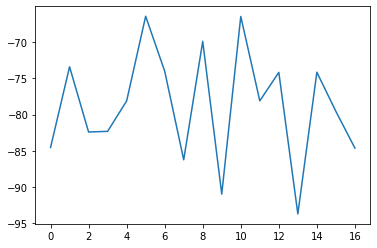

In [34]:
m = data[data['location'] == "V1_23"].describe().loc["mean", :]
plt.plot(np.arange(17), m)

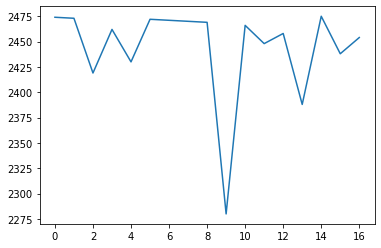

In [35]:
m = data[data['location'] == "V1_23"].describe().loc["count", :]
plt.plot(np.arange(17), m)

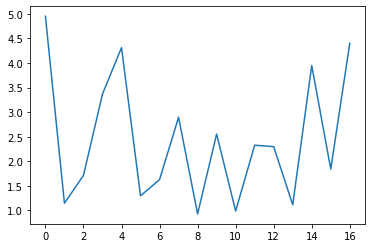

In [36]:
m = data[data['location'] == "V1_23"].describe().loc["std", :]
plt.plot(np.arange(17), m)

In [37]:
def loc_scanner(loc, scanner):
    V1 = data[data['location'] == loc]
    plt.figure()
    plt.plot(np.arange(V1.shape[0]), V1[scanner])
    plt.show()
    
    plt.figure()
    plt.hist(V1[scanner])
    plt.show()

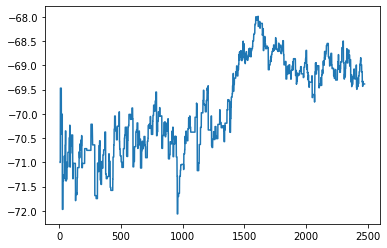

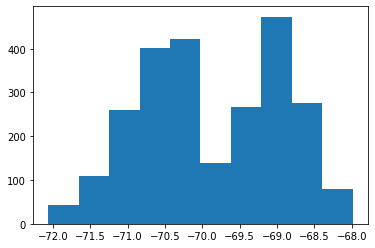

In [38]:
loc_scanner("V1_23", "E6D9D20DD197")

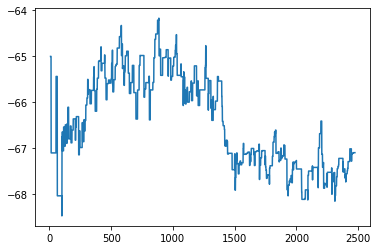

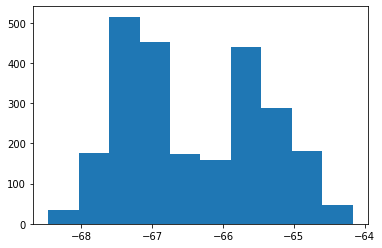

In [39]:
loc_scanner("V1_23", "E96AF2C858BA")